In [1]:
#neural network model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('../generated_cpu_data_with_anomaly.csv')
df['date'] = pd.to_datetime(df['date'])

In [3]:
df

,cpu_util,date,anomaly
0,89.447320,2023-06-25 00:03:05.640,1
1,57.320538,2023-06-25 00:08:05.640,0
2,87.058688,2023-06-25 00:13:05.640,1
3,87.409467,2023-06-25 00:18:05.640,1
4,78.111494,2023-06-25 00:23:05.640,1
...,...,...,...
8635,2.692620,2023-07-24 23:38:06.441,0
8636,30.604348,2023-07-24 23:43:06.441,1
8637,14.278655,2023-07-24 23:48:06.441,0
8638,35.247145,2023-07-24 23:53:06.441,1


In [4]:
num_lags = 2

#add lag
for i in range(1, num_lags+1):
    df['lag_{}'.format(i)] = df['cpu_util'].shift(i)
  
df = df.dropna()

In [5]:
df

,cpu_util,date,anomaly,lag_1,lag_2
2,87.058688,2023-06-25 00:13:05.640,1,57.320538,89.447320
3,87.409467,2023-06-25 00:18:05.640,1,87.058688,57.320538
4,78.111494,2023-06-25 00:23:05.640,1,87.409467,87.058688
5,65.111306,2023-06-25 00:28:05.640,0,78.111494,87.409467
6,94.526610,2023-06-25 00:33:05.640,1,65.111306,78.111494
...,...,...,...,...,...
8635,2.692620,2023-07-24 23:38:06.441,0,16.306464,30.297529
8636,30.604348,2023-07-24 23:43:06.441,1,2.692620,16.306464
8637,14.278655,2023-07-24 23:48:06.441,0,30.604348,2.692620
8638,35.247145,2023-07-24 23:53:06.441,1,14.278655,30.604348


In [6]:
X = df[['cpu_util', 'lag_1', 'lag_2']]
y = df['anomaly']

In [7]:
X['cpu_util'] = (X['cpu_util']/100).astype(float)
X['lag_1'] = (X['lag_1']/100).astype(float)
X['lag_2'] = (X['lag_2']/100).astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_23272\3277832909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cpu_util'] = (X['cpu_util']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_23272\3277832909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lag_1'] = (X['lag_1']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_23272\3277832909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [8]:
X_train = X[:int(0.7*len(X))]
X_test = X[int(0.7*len(X)):]
y_train = y[:int(0.7*len(y))]
y_test = y[int(0.7*len(y)):]

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_23272\3789776307.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:int(0.7*len(y))]
C:\Users\HP\AppData\Local\Temp\ipykernel_23272\3789776307.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[int(0.7*len(y)):]


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(3, 1), return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


189/189 [==============================] - 7s 12ms/step - loss: 0.3298 - accuracy: 0.9211 - val_loss: 0.2087 - val_accuracy: 0.9471
Epoch 2/20
189/189 [==============================] - 1s 7ms/step - loss: 0.2379 - accuracy: 0.9305 - val_loss: 0.1919 - val_accuracy: 0.9471
Epoch 3/20
189/189 [==============================] - 1s 8ms/step - loss: 0.2335 - accuracy: 0.9305 - val_loss: 0.1904 - val_accuracy: 0.9471
Epoch 4/20
189/189 [==============================] - 1s 8ms/step - loss: 0.2302 - accuracy: 0.9305 - val_loss: 0.1938 - val_accuracy: 0.9471
Epoch 5/20
189/189 [==============================] - 1s 7ms/step - loss: 0.2294 - accuracy: 0.9305 - val_loss: 0.1846 - val_accuracy: 0.9471
Epoch 6/20
189/189 [==============================] - 1s 7ms/step - loss: 0.2247 - accuracy: 0.9305 - val_loss: 0.1829 - val_accuracy: 0.9471
Epoch 7/20
189/189 [==============================] - 1s 7ms/step - loss: 0.2221 - accuracy: 0.9305 - val_loss: 0.1748 - val_accuracy: 0.9471
Epo

In [12]:
model.evaluate(X_test, y_test)

 1/81 [..............................] - ETA: 2s - loss: 0.3272 - accuracy: 0.8750

81/81 [==============================] - 0s 4ms/step - loss: 0.1294 - accuracy: 0.9479


[0.12939104437828064, 0.9479166865348816]

In [13]:
model.predict([[0.823, 0.3, 0.3]])

1/1 [==============================] - 1s 811ms/step


array([[0.582662]], dtype=float32)

In [34]:
#get the test data
df_test = pd.read_csv('../generated_cpu_data_test_2.csv')

In [35]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [36]:
df_test

,cpu_util,date
0,66.834766,2023-07-25 00:03:06.466
1,82.067813,2023-07-25 00:08:06.466
2,100.895190,2023-07-25 00:13:06.466
3,73.259342,2023-07-25 00:18:06.466
4,82.504274,2023-07-25 00:23:06.466
...,...,...
10363,28.858958,2023-08-29 23:38:07.394
10364,23.238560,2023-08-29 23:43:07.394
10365,53.869919,2023-08-29 23:48:07.394
10366,30.824553,2023-08-29 23:53:07.394


In [37]:
#add lag
for i in range(1, num_lags+1):
    df_test['lag_{}'.format(i)] = df_test['cpu_util'].shift(i)
    
df_test = df_test.dropna()

In [38]:
df_test

,cpu_util,date,lag_1,lag_2
2,100.895190,2023-07-25 00:13:06.466,82.067813,66.834766
3,73.259342,2023-07-25 00:18:06.466,100.895190,82.067813
4,82.504274,2023-07-25 00:23:06.466,73.259342,100.895190
5,62.700953,2023-07-25 00:28:06.466,82.504274,73.259342
6,88.266038,2023-07-25 00:33:06.466,62.700953,82.504274
...,...,...,...,...
10363,28.858958,2023-08-29 23:38:07.394,31.093691,53.711871
10364,23.238560,2023-08-29 23:43:07.394,28.858958,31.093691
10365,53.869919,2023-08-29 23:48:07.394,23.238560,28.858958
10366,30.824553,2023-08-29 23:53:07.394,53.869919,23.238560


In [39]:
X_test = df_test[['cpu_util', 'lag_1', 'lag_2']]

X_test['cpu_util'] = (X_test['cpu_util']/100).astype(float)
X_test['lag_1'] = (X_test['lag_1']/100).astype(float)
X_test['lag_2'] = (X_test['lag_2']/100).astype(float)

X_test = np.array(X_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_23272\1139415797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cpu_util'] = (X_test['cpu_util']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_23272\1139415797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['lag_1'] = (X_test['lag_1']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_23272\1139415797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [40]:
predict = model.predict(X_test)

131/324 [===========>..................] - ETA: 0s

324/324 [==============================] - 1s 3ms/step


In [41]:
predict

array([[0.2611404 ],
       [0.01330113],
       [0.04069718],
       ...,
       [0.34013516],
       [0.0015581 ],
       [0.00314063]], dtype=float32)

In [42]:
#add the prediction to the test data
df_test['predict'] = predict


C:\Users\HP\AppData\Local\Temp\ipykernel_23272\3300978574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = predict


In [43]:
df_test['predict'] = df_test['predict'].apply(lambda x: 1 if x > 0.5 else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_23272\1053937000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = df_test['predict'].apply(lambda x: 1 if x > 0.5 else 0)


In [44]:
df_test

,cpu_util,date,lag_1,lag_2,predict
2,100.895190,2023-07-25 00:13:06.466,82.067813,66.834766,0
3,73.259342,2023-07-25 00:18:06.466,100.895190,82.067813,0
4,82.504274,2023-07-25 00:23:06.466,73.259342,100.895190,0
5,62.700953,2023-07-25 00:28:06.466,82.504274,73.259342,0
6,88.266038,2023-07-25 00:33:06.466,62.700953,82.504274,0
...,...,...,...,...,...
10363,28.858958,2023-08-29 23:38:07.394,31.093691,53.711871,0
10364,23.238560,2023-08-29 23:43:07.394,28.858958,31.093691,0
10365,53.869919,2023-08-29 23:48:07.394,23.238560,28.858958,0
10366,30.824553,2023-08-29 23:53:07.394,53.869919,23.238560,0


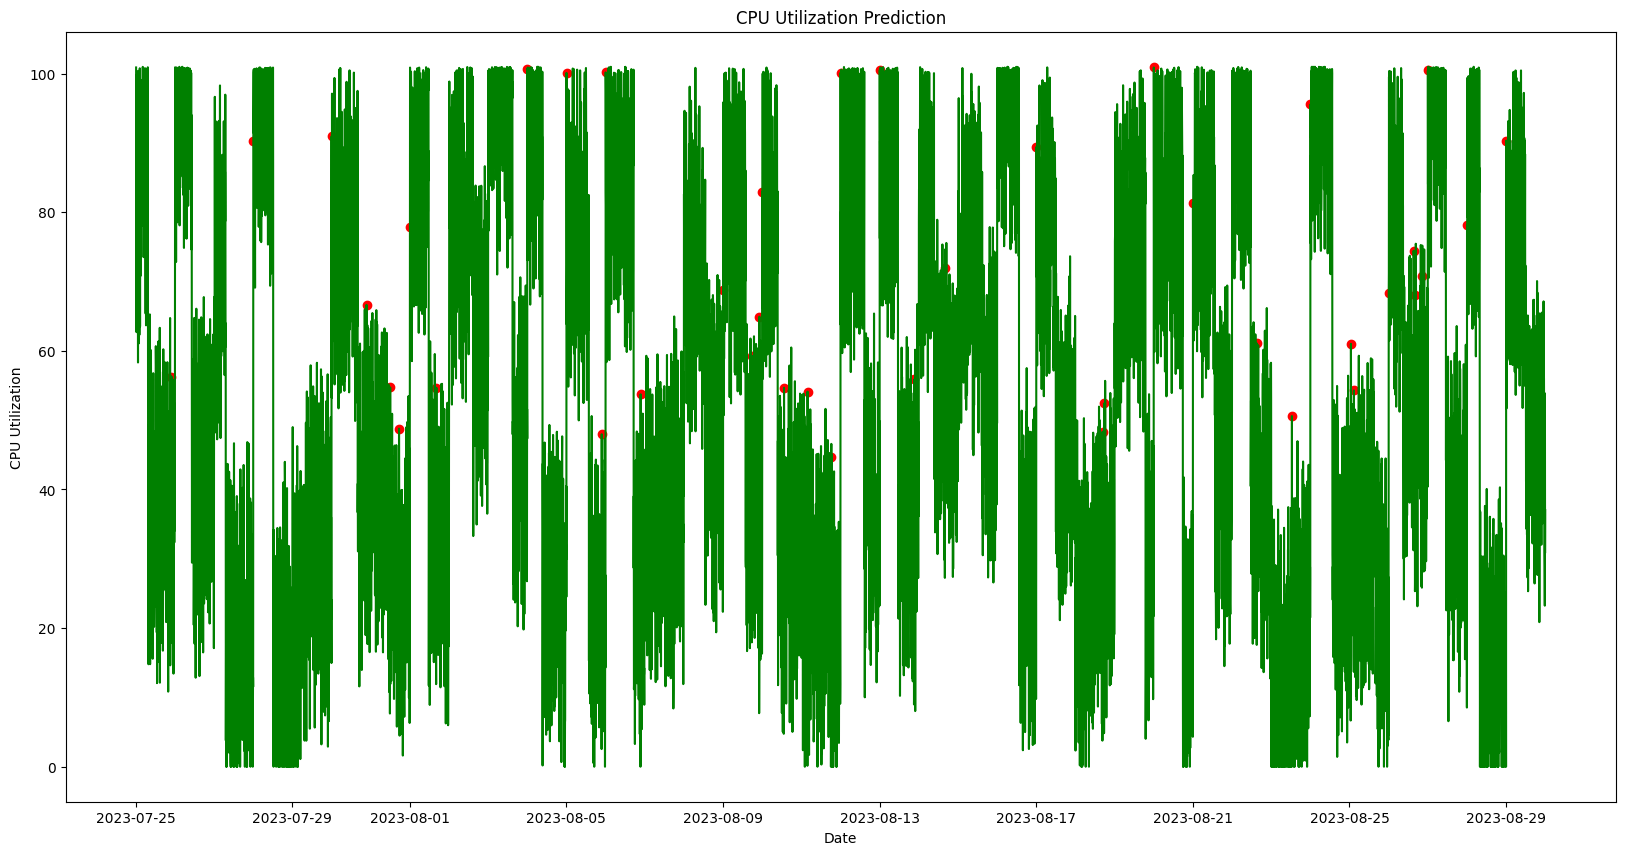

In [45]:
#scatter plot the prediction 1
anomaly = df_test.iloc[np.where(df_test['predict'] == 1)]

plt.figure(figsize=(20,10))
plt.plot(df_test['date'], df_test['cpu_util'], color='green')
plt.scatter(anomaly['date'], anomaly['cpu_util'], color='red')
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization Prediction')
plt.show()



In [46]:
5.8755025e-02

0.058755025

In [47]:
model.save('model_2gap.h5')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
